<a href="https://colab.research.google.com/github/rameshbabulakshmanan84/Finance/blob/master/Creditriskmodelling_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import the dataset
data=pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Credit-Risk-Model/master/train.csv')

In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data.columns.values

array(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [ ]:
#SeriousDlqin2yrs refers to the deliquency happened in last two years 

In [ ]:
#replace yje '-' in the column heading 
x=data.columns.values
#replace'-' in the headings
col=[]
for i in x:
  temp=i.replace('-','')
  col.append(temp)
#print(col)
data.columns = col
print(data.columns.values)

['SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime3059DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime6089DaysPastDueNotWorse'
 'NumberOfDependents']


In [ ]:
#print the top 10 lines
data.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
#Describe the data details
data[data.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
target=data[data.columns[0]]
data=data[data.columns[1:]]


In [ ]:
target.head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: SeriousDlqin2yrs, dtype: int64

In [ ]:
data.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
#check null values
data.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime3059DaysPastDueNotWorse         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime6089DaysPastDueNotWorse         0
NumberOfDependents                       3924
dtype: int64

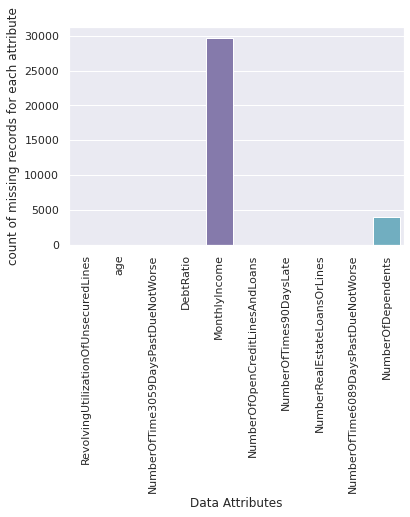

In [ ]:
#graphical rep of the missiong values
x=data.columns
y=data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax=plt.gca()
#for p in ax.patches():
#  height=p.get_height()
#  ax.text(p.get_x()+p.get_width()/2.,height+2,int(height),fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show() 

In [ ]:
#replace the missing value with median values
data.median()
#replace the missing  values with median value
data_updated=data.fillna(value=data.median())
#print
data_updated

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime3059DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime6089DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [ ]:
#check the values of target variable
target.isnull().sum()

0

Text(0.5, 1.0, 'Data Distribution')

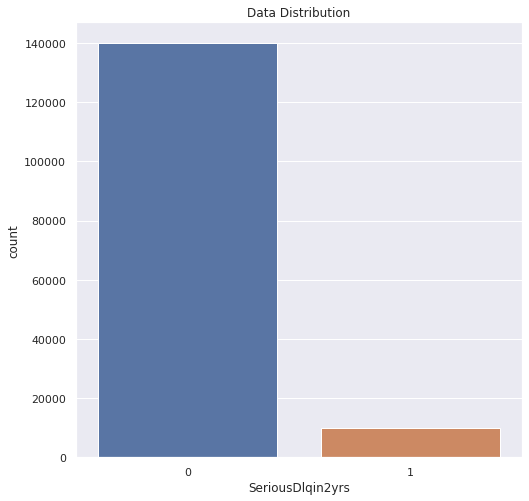

In [ ]:
#check the data imbalances for target variables
target.value_counts()
#graphical representation
sns.set()
sns.countplot(target).set_title("Data Distribution")

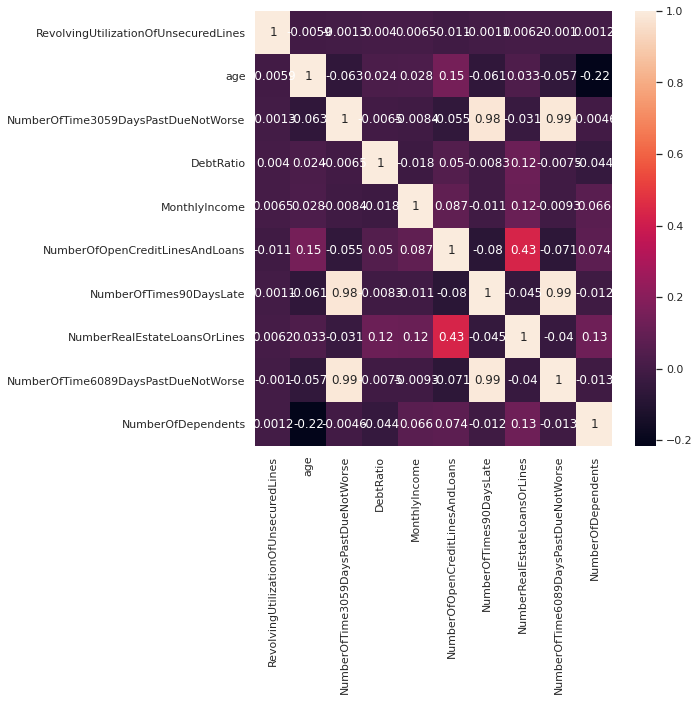

In [ ]:
#use heat map to plot the correlation
sns.heatmap(data_updated.corr(),annot=True)
sns.set(font_scale=1.25)
plt.show()

Feature Selection

#Fitting Random Forest Classification to the Training set


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
classifier.fit(data_updated,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
importances=classifier.feature_importances_


In [ ]:
indices=np.argsort(importances)[::-1]
#indices
for i in range(data_updated.shape[1]):
  print(i+1,data_updated.columns[i],importances[i])


1 RevolvingUtilizationOfUnsecuredLines 0.21661776391609083
2 age 0.12656004600209958
3 NumberOfTime3059DaysPastDueNotWorse 0.06359242109126853
4 DebtRatio 0.16755053691399696
5 MonthlyIncome 0.13676381582760702
6 NumberOfOpenCreditLinesAndLoans 0.08563952111857309
7 NumberOfTimes90DaysLate 0.08984813530956824
8 NumberRealEstateLoansOrLines 0.03306882093742922
9 NumberOfTime6089DaysPastDueNotWorse 0.04187756958788617
10 NumberOfDependents 0.038481369295480385


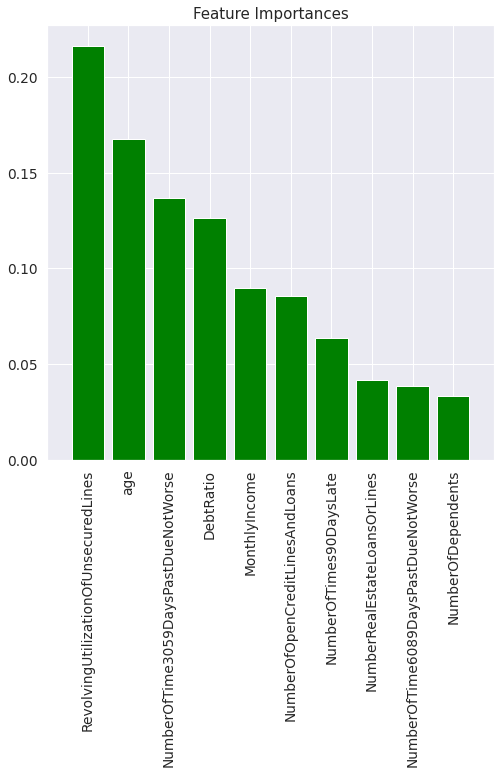

In [ ]:
#plot the graph
plt.title('Feature Importances')
plt.bar(range(data_updated.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(data_updated.shape[1]),data_updated,rotation=90)
plt.xlim([-1, data_updated.shape[1]])
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
#split the dat into train and test data set
from sklearn.model_selection  import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data_updated,target,test_size=0.2,random_state=0)

In [ ]:
#fitting randomforestclassifier to the training set
RF=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features='auto',bootstrap=True,oob_score=False,n_jobs=1,random_state=None,verbose=0)



In [ ]:
#fit the model
RF.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
#predict the test results
y_pred=RF.predict(X_Test)

In [ ]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, y_pred)
np.set_printoptions(precision=2)

In [ ]:
#print the confusion matrix
cm

array([[27653,   304],
       [ 1680,   363]])

In [ ]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27957
           1       0.54      0.18      0.27      2043

    accuracy                           0.93     30000
   macro avg       0.74      0.58      0.62     30000
weighted avg       0.92      0.93      0.92     30000



In [ ]:
from sklearn.metrics import roc_auc_score
#roc_auc_score(Y_Test,y_pred)

0.5834030202770492

In [ ]:
test_labels=RF.predict_proba(X_Test)[:,1]
roc_auc_score(Y_Test,test_labels)

0.8316511471510046

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#different algos are -- Brute,ball_tree,kd_tree -- Nearest neighbor alogos
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',p=2,metric='minkowski',metric_params=None)
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#predict the test results
y_pred=knn.predict(X_Test)

In [ ]:
# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,y_pred)
np.set_printoptions(precision=2)
cm

array([[27865,    92],
       [ 1991,    52]])

In [ ]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27957
           1       0.36      0.03      0.05      2043

    accuracy                           0.93     30000
   macro avg       0.65      0.51      0.51     30000
weighted avg       0.89      0.93      0.90     30000



Fix ADABOOST Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADA=AdaBoostClassifier(base_estimator=None,n_estimators=200,learning_rate=1.0)
ADA.fit(X_Train,Y_Train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=None)

In [ ]:
#predict the test results
y_pred=ADA.predict(X_Test)

In [ ]:
cm = confusion_matrix(Y_Test,y_pred)
np.set_printoptions(precision=2)
cm

array([[27644,   313],
       [ 1632,   411]])

In [ ]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27957
           1       0.57      0.20      0.30      2043

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



**Use Gradient Boosting **

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)
GB.fit(X_Train,Y_Train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#predict the test results
y_pred=GB.predict(X_Test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test,y_pred)
np.set_printoptions(precision=2)
cm

array([[27681,   276],
       [ 1641,   402]])

In [ ]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27957
           1       0.59      0.20      0.30      2043

    accuracy                           0.94     30000
   macro avg       0.77      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000



Cross Validation Scores

In [ ]:
from sklearn.model_selection import cross_val_score

# The results from each evaluation are averaged together for a final score, then the final model is fit on the entire dataset for operationalization.
def cvDictGen(functions,scr,X,Y,cv=5,verbose=1):
  cvDict={}
  for func in functions:

    cvScore=cross_val_score(X,Y,cv=cv,verbose=verbose,scoring=scr)
    cvDict[str(fun).splits('(')[0]]=[cvScore.mean(),cvScore.std()]

  return cvDict

def cvDictNormalize(cvDict):
  cvDictNormalized = {}
  for key in cvDict.keys():
    for  i in cvDict[key]:
      cvDictNormalized[key]= ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
  return cvDictNormalized                 

           


Use Deep learning - 1D CNN and ADABOOST

In [ ]:
#imkort keras libraries
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,classification,roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,mean_squared_error,roc_auc_score,roc_curve,auc, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelBinarizer,label_binarize
import itertools 
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: p

In [ ]:
data_updated.shape

(150000, 10)

In [ ]:
data_updated.shape[1]

10

In [ ]:
target.shape

(150000,)

In [ ]:
#split the dat into train and test data set
from sklearn.model_selection  import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data_updated,target,test_size=0.3,random_state=0)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#Define the function to plot confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):

  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix without normalization") 
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thres=cm.max()/2
  #itertools is used for efficient looping - it is cartesian product of two matrices
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),horizontalalignment="center",color="white" if cm[i,j]> thres else "black") 
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.tight_layout()  
  

In [ ]:
#define the function to plot the roc_auc _curve
def class_roc_auc_score(y_test,y_pred,avrage="micro"):
  lb=LabelBinarizer()
  lb.fit(y_test)
  y_test=lb.fit_transform(y_test)
  y_predict=lb.fit_transform(y_pred)
  return roc_auc_score(y_test,y_predict)

In [ ]:
#define the CNN model
def CNN(X_Train,X_Test,Y_Train,Y_Test):
  #Convert the Dataframe to NP arrays
  X_train=X_Train.to_numpy()
  Y_train=Y_Train.to_numpy()
  X_test=X_Test.to_numpy()
  
  num_classes=2
  batch_size=64
  epochs=10

  #define the input
  #convert the input dimenison to the form CCNN requires -> Batch size,Dim,# of channels.
  # [samples, time steps, features].
  X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1).astype('float32')
  X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1).astype('float32')
  y_train1 = np_utils.to_categorical(Y_Train)
  y_test1=np_utils.to_categorical(Y_Test)

  #define the model
  model=Sequential()
  #create 32 filters with size 3 - convulution layer
  model.add(Conv1D(filters=32,kernel_size=3,input_shape=(10,1)))
  #Create pooling layer
  model.add(MaxPooling1D(pool_size=3))
  #Flatten the layer
  model.add(Flatten())
  #add a dense layer
  model.add(Dense(512,activation='relu'))
  #add a output layer
  model.add(Dense(2,activation='softmax'))

  #print the summary of the model
  model.summary()

  #compile the model
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  #checkpoint creation
  checkpoint=ModelCheckpoint('/content/gdrive/My Drive/Finance/Creditrisk/CNN_Model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

  #earlystop
  earlystop=EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1,restore_best_weights=True)

  #callbacks
  callbacks=[checkpoint,earlystop]
  
  #call the model
  history=model.fit(X_train,y_train1,batch_size=batch_size,epochs=epochs,callbacks=callbacks,validation_data=(X_test,y_test1),shuffle=True)

  #compute the score
  score=model.evaluate(X_test, y_test1, verbose=0)

  #print the scores
  print("Test loss:",score[0])
  print("Test accuracy:",score[1])

  history_dict=history.history
  loss_values=history_dict['loss']
  val_loss_values=history_dict['val_loss']
  train_acc=history_dict['accuracy']
  val_acc=history_dict['val_accuracy']

  epochs=range(1,len(loss_values)+1)

  #plot the training and validation loss
  line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
  line2=plt.plot(epochs,loss_values,label='Training loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.grid(True)
  plt.show()

  #plot the training and validation accuracy
  line1=plt.plot(epochs,val_acc,label="Validation Accuracy")
  line2=plt.plot(epochs,train_acc,label="Training Accuracy")
  plt.ylabel("Accuracy")
  plt.grid(True)
  plt.show()

  #Plot the confusion matrix
  y_pred=model.predict_classes(X_test)

  cnf_matrix=confusion_matrix(Y_Test,y_pred)
  np.set_printoptions(precision=2)
  plt.figure()
  plot_confusion_matrix(cnf_matrix,classes=['0','1'])

  #AUC_ROC curve
  auc1=class_roc_auc_score(Y_Test,y_pred)
  print('AUC for CNN:',auc1)
  y_score=model.predict_proba(X_test)
  n_classes=2
  fpr=dict()
  tpr=dict()
  roc_auc=dict()
  y_test1=label_binarize(y_test1,classes=[0,1])
  for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test1[:,1],y_score[:,1])
    roc_auc[i]=auc(fpr[i],tpr[i])
  colors = list(['blue', 'red'])

  #plot the curve for auc 
  for i, color in zip(range(n_classes),colors):
    plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
  plt.plot([0,1],[1,0],'k--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False positive rate")
  plt.ylabel("True positive rate")
  plt.title("ROC-AUC Curve")
  plt.legend(loc="lower right")
  plt.show()  

  #Print the classification report
  print("Classification Report")
  print(classification_report(Y_Test,y_pred))


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 8, 32)             128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 34,434
Trainable params: 34,434
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1636/1641 [============================>.] - ETA: 0s - loss: 15.8677 - accuracy: 0.8713
Epoch 00001: val_lo

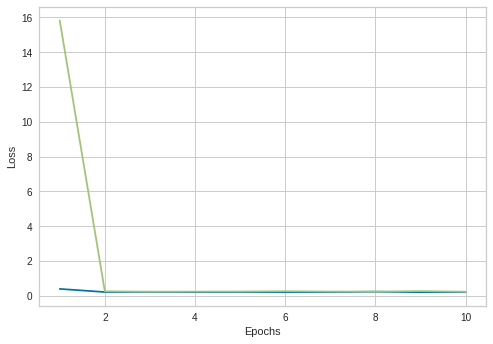

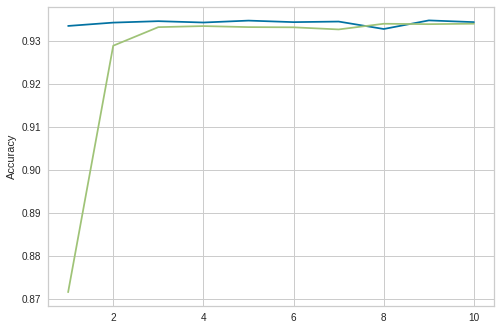

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Confusion matrix without normalization
[[41891    74]
 [ 2879   156]]
AUC for CNN: 0.5248184776244265
Instructions for updating:
Please use `model.predict()` instead.


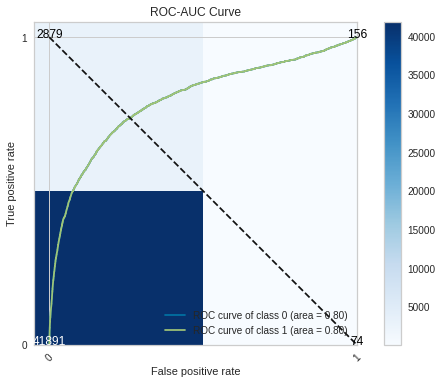

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41965
           1       0.68      0.05      0.10      3035

    accuracy                           0.93     45000
   macro avg       0.81      0.52      0.53     45000
weighted avg       0.92      0.93      0.91     45000



In [ ]:
#Call the function to run the model
CNN(X_Train,X_Test,Y_Train,Y_Test)

In [ ]:
#split the dat into train and test data set
from sklearn.model_selection  import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(data_updated,target,test_size=0.3,random_state=0)

Stacking Classifier to improve prediction

In [ ]:
knn=KNeighborsClassifier()
#set the hyper paramters
params_knn={'n_neighbors':np.arange(1,25)}
#Use gridserach CV to find the right combination
knn_gs=GridSearchCV(knn,params_knn,cv=5)
#fit the model
knn_gs.fit(X_Train,Y_Train)
#find the best estimator
knn_best=knn_gs.best_estimator_
#use RF classifier
rf2=RandomForestClassifier(bootstrap=True,max_depth= 80,max_features= 'auto',min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100,random_state=42)

In [ ]:
#define Adabossting classifier
Ada=AdaBoostClassifier(RandomForestClassifier(),random_state=42)
#def stacking classifier
from mlxtend.classifier import StackingClassifier
from sklearn.externals import joblib 
def stacking(X_Train,X_Test,Y_Train,Y_Test):
  classifiers=[rf2,knn_best]
  sc=StackingClassifier(classifiers,meta_classifier=Ada)
  sc.fit(X_Train,Y_Train)
  joblib.dump(sc,'/content/gdrive/My Drive/Finance/Creditrisk/stacking.pkl')
  print("stacking classifier:Train set")
  y_pred=sc.predict(X_Test)

  #Confusion Matrix
  print("Stacking Classifier :Confusion Matrix: ", confusion_matrix(Y_Test, y_pred))
  print("stakcing classifier:accuracy score:",accuracy_score(Y_Test, y_pred))
  print("stacking classifier:classification report:", classification_report(Y_Test, y_pred))


In [ ]:
#Run the stacking classifier
stacking(X_Train,X_Test,Y_Train,Y_Test)

stacking classifier:Train set
Stacking Classifier :Confusion Matrix:  [[41537   428]
 [ 2455   580]]
stakcing classifier:accuracy score: 0.9359333333333333
stacking classifier:classification report:               precision    recall  f1-score   support

           0       0.94      0.99      0.97     41965
           1       0.58      0.19      0.29      3035

    accuracy                           0.94     45000
   macro avg       0.76      0.59      0.63     45000
weighted avg       0.92      0.94      0.92     45000



In [ ]:
def new_model():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=3, input_shape=(12,1)))
  model.add(MaxPooling1D(pool_size=3))
  model.add(Flatten())
  model.add(Dense(1500, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
  return model

In [ ]:
#https://github.com/Amey-Mohite/1D-cnn-and-AdaBoost-together/blob/master/CNN_ADABOOST.ipynb

In [ ]:
#cvD = cvDictGen(X_Train,Y_Train,scr='roc_auc',functions=[RF,knn, ADA, GB])
#cvD


TypeError: ignored